In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import re
import json

warnings.filterwarnings('ignore')

from IPython.display import display

print(os.listdir('../data/movie'))

['sample_submission.csv', 'test.csv', 'additionalTrainData.csv', 'TestAdditionalFeatures.csv', 'output', '.ipynb_checkpoints', 'train.csv', 'release_dates_per_country.csv', 'trainV3.csv', 'TrainAdditionalFeatures.csv']


In [2]:
df_train = pd.read_csv('../data/movie/train.csv')
df_test = pd.read_csv('../data/movie/test.csv')

print(df_train.shape, df_test.shape)

(3000, 23) (4398, 22)


In [3]:
def kesson_table(df):
    total = df.isnull().sum()
    percent = total / len(df)
    kesson_table = pd.concat([total, percent], keys=['Total', 'Perceent'], axis=1)
    kesson_table = kesson_table.drop(kesson_table[kesson_table['Total'] == 0].index)
    return kesson_table

def graph_display():
    plt.figure(fisgsize=(12, 5))
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy', fontsize=20)
    plt.xlabel('epochs', fontsize=15)
    plt.ylabel('accuracy', fontsize=15)
    plt.show()
    
    plt.figure(figsize=(12, 5))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss', fontsize=20)
    plt.xlabel('epochs', fontsize=15)
    plt.ylabel('loss', fontsize=15)
    plt.show()
    
def diff_col(df_train, df_test):
    #diff_list_all = list(set(df_train.columns + df_test.columns))
    diff_list_train = list(set(df_train.columns) - set(df_test.columns))
    diff_list_test = list(set(df_test.columns) - set(df_train.columns))
    diff_list = set(diff_list_train + diff_list_test)
    return diff_list

In [66]:
df_train.head(2)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435


In [67]:
df_train.drop(['belongs_to_collection'], axis=1, inplace=True)
df_test.drop(['belongs_to_collection'], axis=1, inplace=True)

In [68]:
df_train['log_rev'] = np.log(df_train['revenue'] + 1)

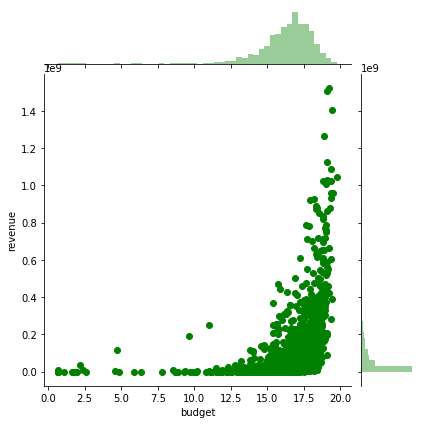

In [69]:
x = np.log(df_train['budget'][df_train['budget'] > 0] + 1)
y = df_train['revenue'][df_train['budget'] > 0]

sns.jointplot(x, y, color='g')

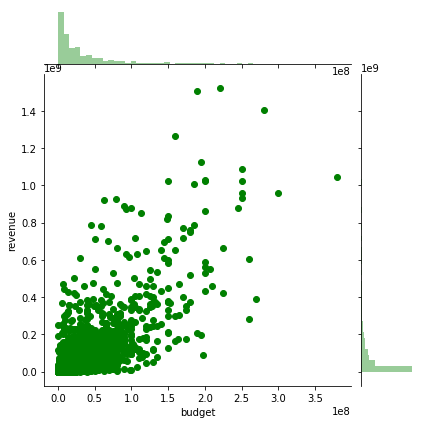

In [70]:
x = df_train['budget'][df_train['budget'] > 0]
y = df_train['revenue'][df_train['budget'] > 0]

sns.jointplot(x, y, color='g')

In [71]:
#df_train['budget_log'] = np.log(df_train['budget'] +1)
#df_test['budget_log'] = np.log(df_test['budget'] + 1)
df_train['budget_mean'] = df_train['budget'] / (df_train['budget'].mean())
df_test['budget_mean'] = df_test['budget'] / (df_train['budget'].mean())

In [72]:
kesson_table(df_train)

,Total,Perceent
genres,7,0.002333
homepage,2054,0.684667
overview,8,0.002667
poster_path,1,0.000333
production_companies,156,0.052000
production_countries,55,0.018333
runtime,2,0.000667
spoken_languages,20,0.006667
tagline,597,0.199000
Keywords,276,0.092000


In [73]:
df_train['genres'] = df_train['genres'].fillna('none')
df_test['genres'] = df_test['genres'].fillna('none')

In [74]:
def get_list(json_file):
    if json_file == 'none':
        return ['none']
    else:
        results = []
        jsons = eval(json_file)
        for json in jsons:
            results.append(json['name'])
        return results

In [75]:
df_train['genre_list'] = df_train['genres'].apply(lambda x: get_list(x))
df_test['genre_list'] = df_test['genres'].apply(lambda x: get_list(x))

In [76]:
df_train

,id,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,...,status,tagline,title,Keywords,cast,crew,revenue,log_rev,budget_mean,genre_list
0,1,14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,...,Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,16.326300,0.621357,[Comedy]
1,2,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,...,Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,18.370959,1.775305,"[Comedy, Drama, Family, Romance]"
2,3,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,...,Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,16.387512,0.146463,[Drama]
3,4,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,...,Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,16.588099,0.053259,"[Thriller, Drama]"
4,5,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,...,Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,15.182615,0.000000,"[Action, Thriller]"
5,6,8000000,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",NaN,tt0093743,en,Pinocchio and the Emperor of the Night,"Pinocchio and his friends, a glow worm and a m...",0.743274,/6IDqA1D2NBIVhzEEaMMRL28iBrq.jpg,...,Released,NaN,Pinocchio and the Emperor of the Night,NaN,"[{'cast_id': 6, 'character': 'Pinocchio (voice...","[{'credit_id': '52fe46f49251416c9106558b', 'de...",3261638,14.997740,0.355061,"[Animation, Adventure, Family]"
6,7,14000000,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",http://www.thepossessionmovie.com/,tt0431021,en,The Possession,A young girl buys an antique box at a yard sal...,7.286477,/4QjzFuaZmB4btGnLwAgdp23BzIU.jpg,...,Released,Fear The Demon That Doesn't Fear God,The Possession,NaN,"[{'cast_id': 23, 'character': 'Clyde', 'credit...","[{'credit_id': '52fe4981c3a368484e12ee29', 'de...",85446075,18.263396,0.621357,"[Horror, Thriller]"
7,8,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,tt0391024,en,Control Room,A chronicle which provides a rare window into ...,1.949044,/83BV8fGy5p9i8RwE9oj76tZ1Ikp.jpg,...,Released,Different channels. Different truths.,Control Room,"[{'id': 917, 'name': 'journalism'}, {'id': 163...","[{'cast_id': 2, 'character': 'Himself', 'credi...","[{'credit_id': '52fe47a69251416c750a0daf', 'de...",2586511,14.765821,0.000000,[Documentary]
8,9,0,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",NaN,tt0117110,en,Muppet Treasure Island,After telling the story of Flint's last journe...,6.902423,/5A8gKzOrF9Z7tSUX6xd5dEx4NXf.jpg,...,Released,Set sail for Muppet mayhem!,Muppet Treasure Island,"[{'id': 204

In [77]:
def create_unique(df, col_list):
    cols = df[col_list]
    unique_index = []
    for col in cols:
        for one_genre in col:
            if one_genre not in unique_index:
                unique_index.append(one_genre)
    del_list = 'none'
    for word in del_list:
        try:
            unique_index.remove(word)
        except:
            pass
    unique_index.append('none')
    return unique_index

def diff_unique_list(df1, df2, col_name):
    """this function use when df[col_name] is list
    """
    train_list = create_unique(df1, col_name)
    test_list = create_unique(df2, col_name)
    #all_list = train_list + test_list
    #diff_list = list(set(all_list))
    diff_list = list(set(train_list) - set(test_list))
    #diff_list_2 = list(set(test_list) - set(train_list))
    #diff_list = diff_list_1 + diff_list_2
    return diff_list

def return_one(unique_x, unique):
    if unique in unique_x:
        return 1
    else:
        return 0
    
def return_one_list(x, x_list):
    for x_one in x:
        if x_one in x_list:
            return 1
        else:
            return 0

def create_new_onehot(df, col_name , col_list):
    unique_list = create_unique(df, col_list)
    for unique in unique_list:
        df[col_name + '_' + unique] = pd.Series(np.zeros(df.shape[0],))
        df[col_name + '_' + unique] = df[col_list].apply(lambda x:return_one(x, unique))

In [78]:
create_new_onehot(df_train, 'genres', 'genre_list')
create_new_onehot(df_test, 'genres', 'genre_list')

In [79]:
df_train['homepage'] = df_train['homepage'].fillna('none')
df_test['homepage'] = df_test['homepage'].fillna('none')

df_train['homepage'][df_train['homepage'] != 'none'] = 1
df_train['homepage'][df_train['homepage'] == 'none'] = 0

df_test['homepage'][df_test['homepage'] != 'none'] = 1
df_test['homepage'][df_test['homepage'] == 'none'] = 0

In [80]:
def diff_unique_one(df_train, df_test, col_name):
    """this function don't use when the value of df[col_name] is list.
       only use df[col_name] isn't list.
    """
    train_list = df_train[col_name].value_counts()
    test_list = df_test[col_name].value_counts()
    #all_list = train_list.index + test_list.index
    #diff_list = list(set(all_list))
    diff_list = list(set(train_list.index) - set(test_list.index))
    #diff_list_2 = list(set(train_list.index) - set(test_list.index))
    #diff_list = diff_list_1 + diff_list_2
    return diff_list

def drop_only_index(df_train, df_test, col_name):
    diff_list = diff_unique_list(df_train, df_test, col_name)
    df_train.drop(diff_list,axis=1, inplace=True)
    df_test.drop(diff_list,axis=1, inplace=True)

In [81]:
drop_only_index(df_train, df_test, 'original_language')

In [82]:
df_train['popularity'].describe()

count    3000.000000
mean        8.463274
std        12.104000
min         0.000001
25%         4.018053
50%         7.374861
75%        10.890983
max       294.337037
Name: popularity, dtype: float64

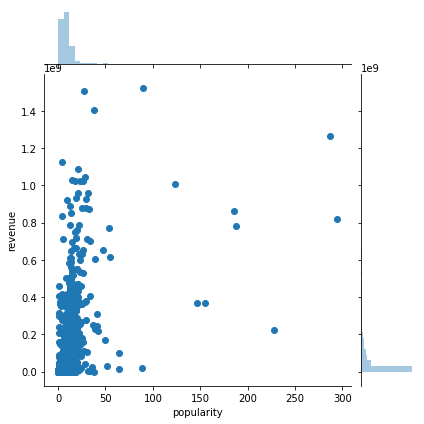

In [83]:
sns.jointplot(x='popularity', y='revenue',data=df_train)

In [84]:
Drop = ['original_title', 'overview', 'poster_path']

df_train.drop(Drop, axis=1, inplace=True)
df_test.drop(Drop, axis=1, inplace=True)

In [85]:
def fill_none(col_name):
    df_train[col_name] = df_train[col_name].fillna('none')
    df_test[col_name] = df_test[col_name].fillna('none')

fill_none('production_companies')

In [86]:
df_train['company_list'] = df_train['production_companies'].apply(lambda x: get_list(x))
df_test['company_list'] = df_test['production_companies'].apply(lambda x: get_list(x))

In [87]:
#train_list = create_unique(df_train, 'company_list')
#test_list = create_unique(df_train, 'company_list')
diff_list = diff_unique_list(df_train, df_test, 'company_list')

In [88]:
def get_diff_value(df1, df2, col_name):
    """this function use when df[col_name] is list
    """
    train_list = create_unique(df1, col_name)
    test_list = create_unique(df2, col_name)
    all_list = list(set(train_list + test_list))
    diff_list_train = list(set(all_list) - set(train_list))
    diff_list_test = list(set(all_list) - set(test_list))
    diff_list = diff_list_train + diff_list_test
    same_list = list(set(all_list) - set(diff_list))
    
    return same_list, diff_list, all_list

In [89]:
same, diff, all_list = get_diff_value(df_train, df_test, 'company_list')

In [90]:
train_list = create_unique(df_train, 'company_list')

In [91]:
def dict_count(df, col_list):
    dictionary = {}
    for cols in df[col_list]:
        for col in cols:
            if col not in dictionary:
                dictionary[col] = 0
            else:
                pass
            if col in train_list:
                dictionary[col] += 1
    sort = sorted(dictionary.items(), key=lambda x: x[1], reverse=True)
    return sort

In [92]:
sort = dict_count(df_train, 'company_list')

In [93]:
def select_number_limit(sort, num):
    select_list = []
    for select in sort:
        if select[1] > num:
            select_list.append(select[0])
    return select_list
        
select_list = select_number_limit(sort, 20)

df_train['company_20'] = df_train['company_list'].apply(lambda x: return_one_list(x, select_list))
df_test['company_20'] = df_test['company_list'].apply(lambda x: return_one_list(x, select_list))

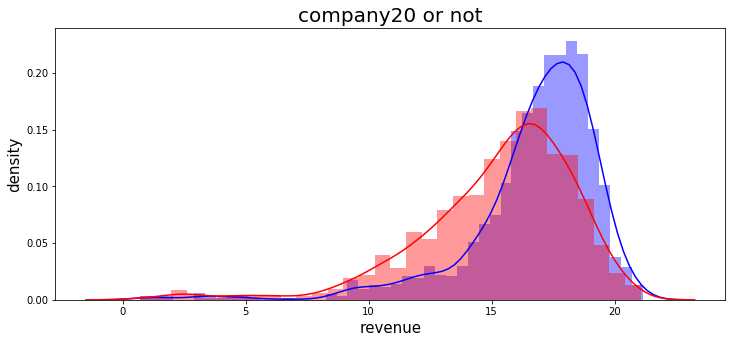

In [94]:
company_20 = df_train['log_rev'][df_train['company_20'] == 1]
company_non = df_train['log_rev'][df_train['company_20'] == 0]

plt.figure(figsize=(12, 5))
sns.distplot(company_20, color='b')
sns.distplot(company_non, color='r')
plt.title('company20 or not', fontsize=20)
plt.xlabel('revenue', fontsize=15)
plt.ylabel('density', fontsize=15)
plt.show()

In [95]:
df_train['production_countries'] = df_train['production_countries'].fillna('none')
df_test['production_countries'] = df_test['production_countries'].fillna('none')

df_train['country_list'] = df_train['production_countries'].apply(lambda x: get_list(x))
df_test['country_list'] = df_test['production_countries'].apply(lambda x: get_list(x))

In [96]:
dict_country = dict_count(df_train, 'country_list')
select_country = select_number_limit(dict_country, 50)

df_train['country_20'] = df_train['country_list'].apply(lambda x: return_one_list(x, select_country))
df_test['country_20'] = df_test['country_list'].apply(lambda x: return_one_list(x, select_country))

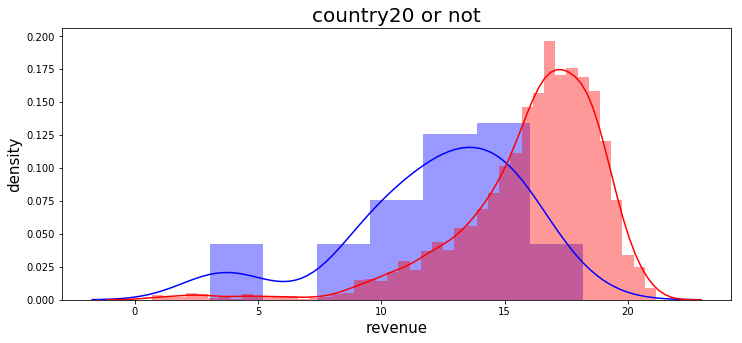

In [97]:
country_20 = df_train['log_rev'][df_train['country_20'] == 1]
country_non = df_train['log_rev'][df_train['country_20'] == 0]

plt.figure(figsize=(12, 5))
sns.distplot(country_20, color='b')
sns.distplot(country_non, color='r')
plt.title('country20 or not', fontsize=20)
plt.xlabel('revenue', fontsize=15)
plt.ylabel('density', fontsize=15)
plt.show()

In [98]:
df_test['title'][df_test['release_date'].isnull()]

828    Jails, Hospitals & Hip-Hop
Name: title, dtype: object

In [99]:
df_train['release_year'] = df_train['release_date'].apply(lambda x: x[-2:])

df_test['release_date'] = df_test['release_date'].fillna('11/11/00')
df_test['release_year'] = df_test['release_date'].apply(lambda x: x[-2:])

In [100]:
def get_year(year):
    year = int(year)
    if year > 20 and year < 100:
        return 1900 + year
    else:
        return 2000 + year

In [101]:
df_train['release_year'] = df_train['release_year'].apply(lambda x: get_year(x))
df_test['release_year'] = df_test['release_year'].apply(lambda x: get_year(x))

<Figure size 864x360 with 0 Axes>

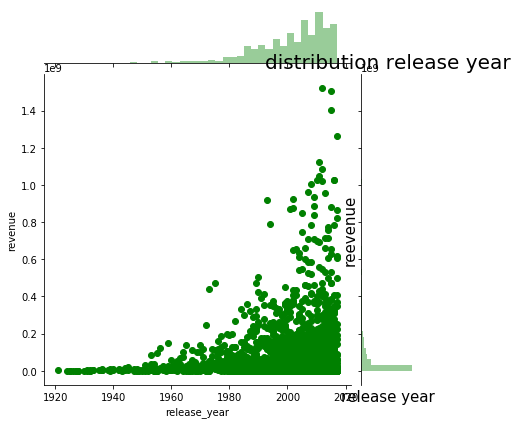

In [102]:
plt.figure(figsize=(12, 5))

sns.jointplot(x='release_year', y='revenue', data=df_train, color='g')
plt.title('distribution release year', fontsize=20)
plt.xlabel('release year', fontsize=15)
plt.ylabel('reevenue', fontsize=15)
plt.show()

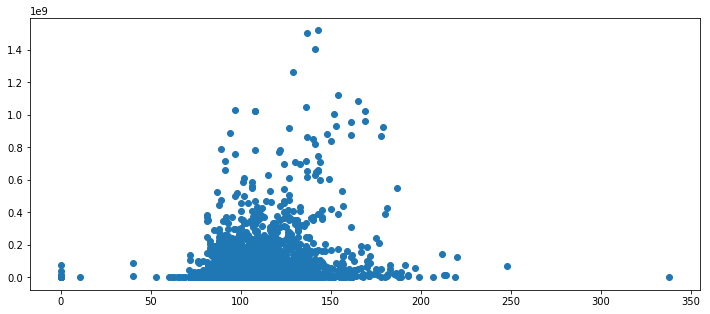

In [103]:
plt.figure(figsize=(12, 5))
plt.scatter(x='runtime', y='revenue', data=df_train)

In [104]:
df_train['runtime'] = df_train['runtime'].fillna(df_train['runtime'].median())
df_test['runtime'] = df_test['runtime'].fillna(df_test['runtime'].median())

In [105]:
df_train['spoken_languages'] = df_train['spoken_languages'].fillna('none')
df_test['spoken_languages'] = df_test['spoken_languages'].fillna('none')

In [106]:
df_train['language_list'] = df_train['spoken_languages'].apply(lambda x: get_list(x))
df_test['language_list'] = df_test['spoken_languages'].apply(lambda x: get_list(x))

In [107]:
select_list = select_number_limit(sort, 2000)

df_train['language_20'] = df_train['language_list'].apply(lambda x: return_one_list(x, select_list))
df_test['language_20'] = df_test['language_list'].apply(lambda x: return_one_list(x, select_list))

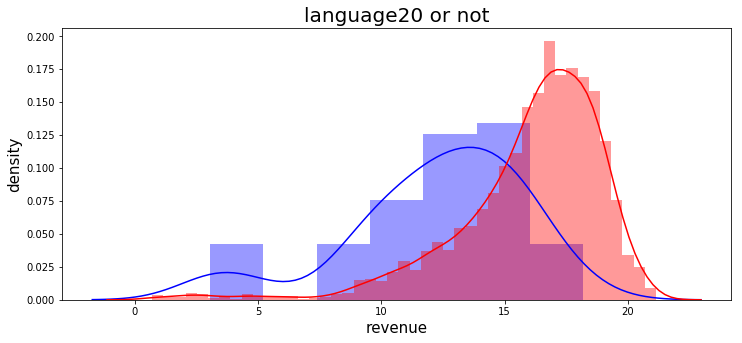

In [108]:
language_20 = df_train['log_rev'][df_train['language_20'] == 1]
language_non = df_train['log_rev'][df_train['language_20'] == 0]

plt.figure(figsize=(12, 5))
sns.distplot(country_20, color='b')
sns.distplot(country_non, color='r')
plt.title('language20 or not', fontsize=20)
plt.xlabel('revenue', fontsize=15)
plt.ylabel('density', fontsize=15)
plt.show()

In [109]:
df_train['status'][df_train['status'] == 'Released'] = 1
df_train['status'][df_train['status'] == 'Rumored'] = 0

df_test['status'] = df_test['status'].fillna(1)
df_test['status'][df_test['status'] == 'Released'] = 1
df_test['status'][df_test['status'] == 'Rumored'] = 0

In [110]:
df_test[df_test['status'].isnull()]

,id,budget,genres,homepage,imdb_id,original_language,popularity,production_companies,production_countries,release_date,...,genres_Western,genres_Foreign,genres_none,company_list,company_20,country_list,country_20,release_year,language_list,language_20


In [111]:
def get_list_gender(json_file):
    if json_file == 'none':
        return ['none']
    else:
        results = []
        jsons = eval(json_file)
        for json in jsons:
            results.append(json['gender'])
        return results

In [112]:
Drop = ['tagline', 'Keywords', 'title']

df_train.drop(Drop, axis=1, inplace=True)
df_test.drop(Drop, axis=1, inplace=True)

In [113]:
df_train['cast'] = df_train['cast'].fillna('none')
df_test['cast'] = df_test['cast'].fillna('none')

df_train['gender_list'] = df_train['cast'].apply(lambda x: get_list_gender(x))
df_test['gender_list'] = df_test['cast'].apply(lambda x: get_list_gender(x))

In [114]:
def add_gender(x_list):
    sum_ = 0
    for value in x_list:
        if value == 'none':
            return 0
        else:
            sum_ += value
    average = sum_ / (len(x_list) + 1)
    return average

In [115]:
df_train['gender_sum'] = df_train['gender_list'].apply(lambda x: add_gender(x))
df_test['gender_sum'] = df_test['gender_list'].apply(lambda x: add_gender(x))

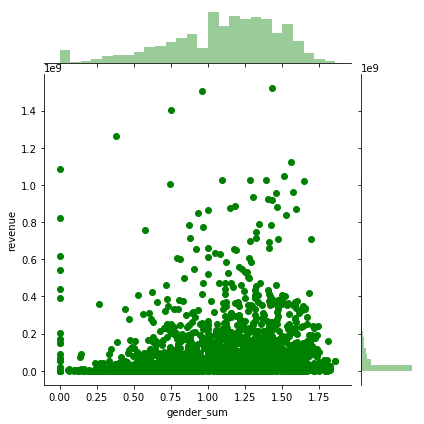

In [116]:
sns.jointplot(x='gender_sum', y='revenue', color='g', data=df_train)

In [117]:
df_train.drop(['crew'], axis=1, inplace=True)
df_test.drop(['crew'], axis=1, inplace=True)

In [118]:
diff_col(df_train, df_test)

{'genres_TV Movie', 'log_rev', 'revenue'}

In [119]:
Drop = ['budget', 'genres', 'homepage', 'imdb_id', 'production_companies', 'production_countries',
        'release_date', 'spoken_languages', 'status', 'cast','company_list',
        'country_list', 'language_list','gender_list', 'genre_list']

df_train.drop(Drop, axis=1, inplace=True)
df_test.drop(Drop, axis=1, inplace=True)

In [120]:
df_train = pd.get_dummies(df_train, columns=['original_language'])
df_test = pd.get_dummies(df_test, columns=['original_language'])

In [121]:
Drop = ['original_language_ar','original_language_nb', 'original_language_vi', 'original_language_fa','original_language_mr']

df_train.drop(Drop, axis=1, inplace=True)

Drop = ['original_language_af', 'original_language_bm', 'original_language_ca',
        'original_language_is', 'original_language_ka', 'original_language_kn',
        'original_language_th', 'original_language_xx',]

df_test.drop(Drop, axis=1, inplace=True)

In [122]:
df_train.columns

Index(['id', 'popularity', 'runtime', 'revenue', 'log_rev', 'budget_mean',
       'genres_Comedy', 'genres_Drama', 'genres_Family', 'genres_Romance',
       'genres_Thriller', 'genres_Action', 'genres_Animation',
       'genres_Adventure', 'genres_Horror', 'genres_Documentary',
       'genres_Music', 'genres_Crime', 'genres_Science Fiction',
       'genres_Mystery', 'genres_Foreign', 'genres_Fantasy', 'genres_War',
       'genres_Western', 'genres_History', 'genres_none', 'genres_TV Movie',
       'company_20', 'country_20', 'release_year', 'language_20', 'gender_sum',
       'original_language_bn', 'original_language_cn', 'original_language_cs',
       'original_language_da', 'original_language_de', 'original_language_el',
       'original_language_en', 'original_language_es', 'original_language_fi',
       'original_language_fr', 'original_language_he', 'original_language_hi',
       'original_language_hu', 'original_language_id', 'original_language_it',
       'original_language_ja'

In [131]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


train = df_train.drop(['id', 'revenue', 'log_rev', 'genres_TV Movie'], axis=1)
test = df_test.drop(['id',], axis=1)
train_ = df_train['log_rev']

X_train = sc.fit_transform(train.values)
X_test = sc.fit_transform(test.values)
y_train = train_.values / 10000

#X_train = train.values
#X_test = test.values

print(X_train.shape, y_train.shape, X_test.shape)

(3000, 59) (3000,) (4398, 59)


In [132]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import Adam, RMSprop
from keras.layers.recurrent import LSTM

In [133]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
predict = xgb.predict(X_test)
predict = np.expm1(predict*10000)
predict

array([  835971.2,  1297866.2,  4512073.5, ..., 47632944. ,  6696855.5,
        4991753. ], dtype=float32)

In [134]:
df_out = pd.read_csv('../data/movie/test.csv')
df_out['revenue'] = predict

df_out[['id', 'revenue']].to_csv('../data/movie/output/boost.csv', index=False, header=True)

In [424]:

model = Sequential()
model.add(Dense(6000, activation='relu', input_dim=59))
model.add(Dropout(0.5))
#model.add(Dense(60*10, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(1))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_94 (Dense)             (None, 6000)              360000    
_________________________________________________________________
dropout_54 (Dropout)         (None, 6000)              0         
_________________________________________________________________
dense_95 (Dense)             (None, 1)                 6001      
Total params: 366,001
Trainable params: 366,001
Non-trainable params: 0
_________________________________________________________________


In [425]:
model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mse'])
history = model.fit(X_train, y_train, epochs=100, batch_size=500, validation_split=0.2, verbose=1)
print(history.history.keys())

scores = model.evaluate(X_train, y_train, batch_size=30)
print('%s: %.2f%%' % (model.metrics_names[1], scores[1]*100))

Train on 2400 samples, validate on 600 samples
Epoch 1/100
2400/2400 [==============================] - 2s 1ms/step - loss: 1.5548 - mean_squared_error: 1.5548 - val_loss: 1.3383 - val_mean_squared_error: 1.3383
Epoch 2/100
2400/2400 [==============================] - 0s 141us/step - loss: 1.0879 - mean_squared_error: 1.0879 - val_loss: 0.9024 - val_mean_squared_error: 0.9024
Epoch 3/100
2400/2400 [==============================] - 0s 140us/step - loss: 0.8419 - mean_squared_error: 0.8419 - val_loss: 0.7912 - val_mean_squared_error: 0.7912
Epoch 4/100
2400/2400 [==============================] - 0s 141us/step - loss: 0.7474 - mean_squared_error: 0.7474 - val_loss: 0.6761 - val_mean_squared_error: 0.6761
Epoch 5/100
2400/2400 [==============================] - 0s 146us/step - loss: 0.6737 - mean_squared_error: 0.6737 - val_loss: 0.7127 - val_mean_squared_error: 0.7127
Epoch 6/100
2400/2400 [==============================] - 0s 158us/step - loss: 0.6628 - mean_squared_error: 0.6628 - val

Epoch 98/100
2400/2400 [==============================] - 0s 177us/step - loss: 0.4658 - mean_squared_error: 0.4658 - val_loss: 0.8602 - val_mean_squared_error: 0.8602
Epoch 99/100
2400/2400 [==============================] - 0s 167us/step - loss: 0.3871 - mean_squared_error: 0.3871 - val_loss: 0.9479 - val_mean_squared_error: 0.9479
Epoch 100/100
2400/2400 [==============================] - 0s 162us/step - loss: 0.3735 - mean_squared_error: 0.3735 - val_loss: 0.9769 - val_mean_squared_error: 0.9769
dict_keys(['val_loss', 'val_mean_squared_error', 'loss', 'mean_squared_error'])
3000/3000 [==============================] - 0s 103us/step
mean_squared_error: 45.36%


In [426]:
predict = model.predict(X_test)
predict = predict * 100000000 
#predict = np.round(predict)

df_out = pd.read_csv('../data/movie/test.csv')
df_out['revenue'] = predict

df_out[['id', 'revenue']].to_csv('../data/movie/output/submit.csv', index=False, header=True)